In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
from IPython.display import display
from pandas.plotting import scatter_matrix


In [2]:
# Subir el archivo automáticamente en Google Colab
from google.colab import files
uploaded = files.upload()

# Cargar el archivo Excel en un DataFrame
file_path = "SP500_datos1y.xlsx"


# Cargar el excel en un dataframe
df = pd.read_excel(file_path, sheet_name="s&p500")

# Mostrar las primeras filas para entender la estructura de los datos
df.head()


Saving SP500_datos1y.xlsx to SP500_datos1y.xlsx


,Date,Close,High,Low,Open,Volume
0,2024-02-05,4942.810059,4957.189941,4918.089844,4957.189941,4023640000
1,2024-02-06,4954.229980,4957.770020,4934.879883,4950.160156,4440880000
2,2024-02-07,4995.060059,4999.890137,4969.049805,4973.049805,4895590000
3,2024-02-08,4997.910156,5000.399902,4987.089844,4995.160156,4341860000
4,2024-02-09,5026.609863,5030.060059,5000.339844,5004.169922,3912990000


In [3]:
# Limpieza de datos

# Número de observaciones y variables
num_observations = df.shape[0]
num_variables = df.shape[1]

# Tipo de datos
data_types = df.dtypes

# Medidas de tendencia central y dispersión
summary_statistics = df.describe()

# Identificación de outliers usando el método de Z-score
df_numeric = df.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(df_numeric))
outliers = (z_scores > 3).sum()

print(f"El número de observaciones es: {num_observations:}")
print(f"El número de variables es: {num_variables:}")
display(data_types)
display(outliers)
display(summary_statistics)


El número de observaciones es: 250
El número de variables es: 6


,0
Date,datetime64[ns]
Close,float64
High,float64
Low,float64
Open,float64
Volume,int64


,0
Close,0
High,0
Low,0
Open,0
Volume,6


,Date,Close,High,Low,Open,Volume
count,250,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,2024-08-02 21:59:02.400000,5530.964035,5555.017361,5504.150355,5531.140342,3.965868e+09
min,2024-02-05 00:00:00,4942.810059,4957.189941,4918.089844,4950.160156,1.757720e+09
25%,2024-05-03 18:00:00,5218.997437,5241.267578,5195.992554,5222.197632,3.546435e+09
50%,2024-08-03 12:00:00,5525.614990,5555.245117,5499.084961,5513.760010,3.845765e+09
75%,2024-10-30 18:00:00,5840.157715,5865.949951,5810.544800,5834.357544,4.240080e+09
max,2025-02-03 00:00:00,6118.709961,6128.180176,6088.740234,6121.430176,8.223220e+09
std,NaN,342.189174,342.984931,341.086604,342.299235,7.647347e+08


In [4]:
# Verificar valores nulos
missing_values = df.isnull().sum()

# Verificar duplicados
duplicates = df.duplicated().sum()

# Convertir la columna de fecha a formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Ordenar los datos por fecha (por si acaso no estuvieran ordenados)
df = df.sort_values(by='Date')

# Verificar la información del dataset después de la limpieza
print(f"Los duplicados son: {duplicates:}")
print(f"Los valores nulos son: {missing_values:}")
df.info()
df.head()


Los duplicados son: 0
Los valores nulos son: Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    250 non-null    datetime64[ns]
 1   Close   250 non-null    float64       
 2   High    250 non-null    float64       
 3   Low     250 non-null    float64       
 4   Open    250 non-null    float64       
 5   Volume  250 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.8 KB


,Date,Close,High,Low,Open,Volume
0,2024-02-05,4942.810059,4957.189941,4918.089844,4957.189941,4023640000
1,2024-02-06,4954.229980,4957.770020,4934.879883,4950.160156,4440880000
2,2024-02-07,4995.060059,4999.890137,4969.049805,4973.049805,4895590000
3,2024-02-08,4997.910156,5000.399902,4987.089844,4995.160156,4341860000
4,2024-02-09,5026.609863,5030.060059,5000.339844,5004.169922,3912990000


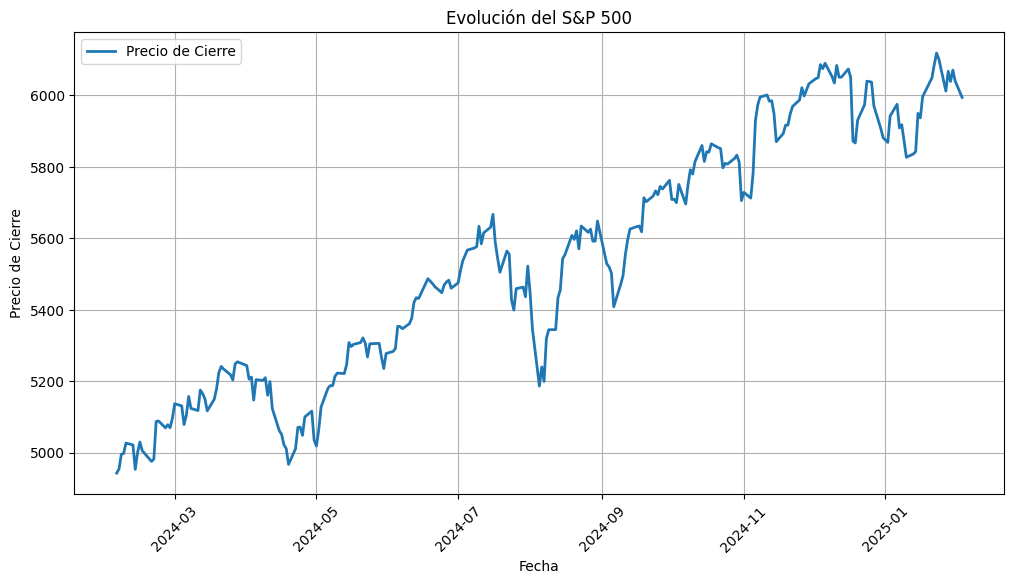

In [5]:
# Graficar la evolución del precio de cierre
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Precio de Cierre', linewidth=2)

# Configuración de la gráfica
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.title('Evolución del S&P 500')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()


In [ ]:
# Transformación de datos

# Crear medias móviles para tendencias a corto y largo plazo
df['SMA_10'] = df['Close'].rolling(window=10).mean()  # Media móvil de 10 días
df['SMA_30'] = df['Close'].rolling(window=30).mean()  # Media móvil de 30 días

# Calcular la volatilidad (desviación estándar móvil de 10 días)
df['Volatility_10'] = df['Close'].rolling(window=10).std()

# Calcular el Retorno Diario Logarítmico
df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))

# Guardar el archivo complementado
df.to_excel("SP500_completo.xlsx", index=False)

# Mostrar los primeros registros con las nuevas columnas
df.head()


,Date,Close,High,Low,Open,Volume,SMA_10,SMA_30,Volatility_10,Log_Return
0,2024-02-05,4942.810059,4957.189941,4918.089844,4957.189941,4023640000,NaN,NaN,NaN,NaN
1,2024-02-06,4954.229980,4957.770020,4934.879883,4950.160156,4440880000,NaN,NaN,NaN,0.002308
2,2024-02-07,4995.060059,4999.890137,4969.049805,4973.049805,4895590000,NaN,NaN,NaN,0.008208
3,2024-02-08,4997.910156,5000.399902,4987.089844,4995.160156,4341860000,NaN,NaN,NaN,0.000570
4,2024-02-09,5026.609863,5030.060059,5000.339844,5004.169922,3912990000,NaN,NaN,NaN,0.005726


In [ ]:
# Cálculo de estadísticas descriptivas clave para ANOVA
anova_summary = pd.DataFrame({
    'Variable': ['Close', 'High', 'Low', 'Open'],
    'Media': df[['Close', 'High', 'Low', 'Open']].mean().values,
    'Varianza': df[['Close', 'High', 'Low', 'Open']].var().values,
    'Desviación Estándar': df[['Close', 'High', 'Low', 'Open']].std().values
})

# ANOVA para comparar las diferencias entre las medias de las variables de precios
anova_result = stats.f_oneway(df['Close'], df['High'], df['Low'], df['Open'])

# Mostrar resultados del ANOVA
print("Resultados del ANOVA:")
print(f"Estadístico F: {anova_result.statistic:.4f}")
print(f"Valor p: {anova_result.pvalue:.4f}")

# Interpretación del resultado
alpha = 0.05  # Nivel de significancia
if anova_result.pvalue < alpha:
    print("\nConclusión: Se RECHAZA la hipótesis nula.")
    print("Explicación: Existe evidencia estadísticamente significativa para afirmar que al menos una de las medias de las variables de precios es diferente.")
else:
    print("\nConclusión: NO se puede rechazar la hipótesis nula.")
    print("Explicación: No hay suficiente evidencia para afirmar que existen diferencias significativas entre las medias de las variables de los precios.")

# Mostrar tabla de estadísticas descriptivas
print("\nResumen Estadístico ANOVA:")
print(anova_summary)


Resultados del ANOVA:
Estadístico F: 0.9225
Valor p: 0.4293

Conclusión: NO se puede rechazar la hipótesis nula.
Explicación: No hay suficiente evidencia para afirmar que existen diferencias significativas entre las medias de las variables de los precios.

Resumen Estadístico ANOVA:
  Variable        Media       Varianza  Desviación Estándar
0    Close  5530.964035  117093.430909           342.189174
1     High  5555.017361  117638.662930           342.984931
2      Low  5504.150355  116340.071506           341.086604
3     Open  5531.140342  117168.766103           342.299235


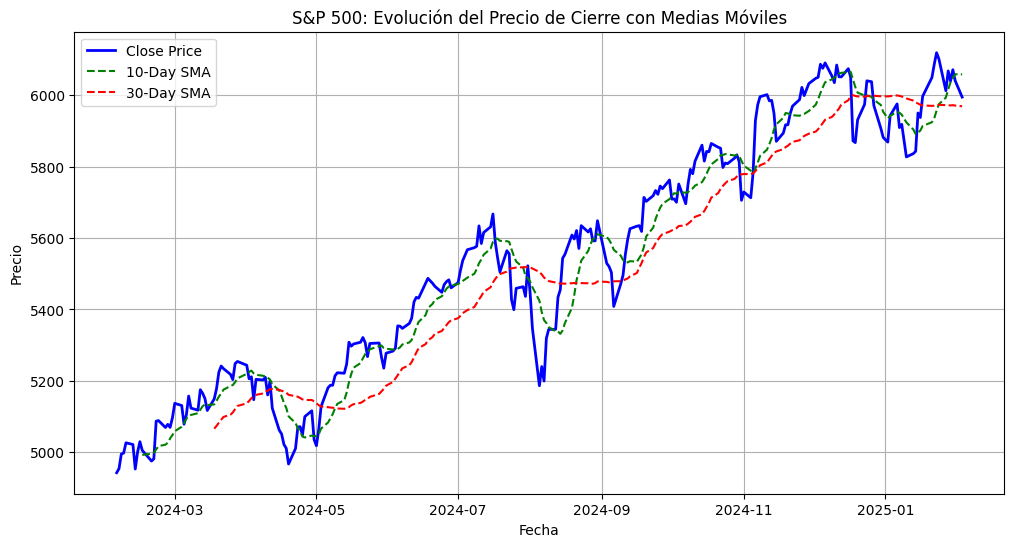

In [ ]:
# Gráfico 1: Serie temporal del precio de cierre con medias móviles
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label="Close Price", linewidth=2, color="blue")
plt.plot(df['Date'], df['SMA_10'], label="10-Day SMA", linestyle="dashed", color="green")
plt.plot(df['Date'], df['SMA_30'], label="30-Day SMA", linestyle="dashed", color="red")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.title("S&P 500: Evolución del Precio de Cierre con Medias Móviles")
plt.legend()
plt.grid(True)
plt.show()


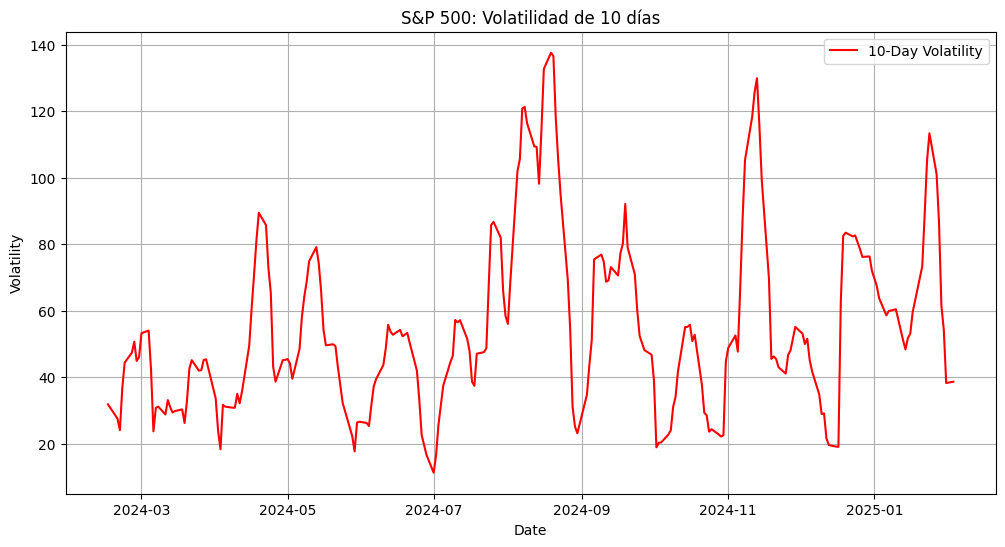

In [ ]:
# Gráfico 2: Volatilidad
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Volatility_10'], label="10-Day Volatility", color="red")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("S&P 500: Volatilidad de 10 días")
plt.legend()
plt.grid(True)
plt.show()


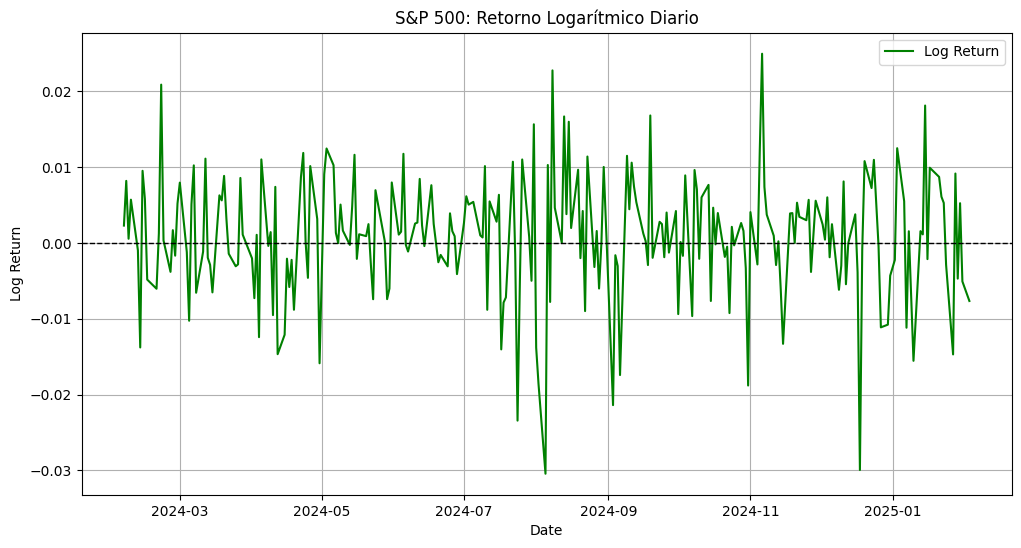

In [ ]:
# Gráfico 3: Retorno Logarítmico Diario
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Log_Return'], label="Log Return", color="green")
plt.axhline(0, color="black", linestyle="dashed", linewidth=1)
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.title("S&P 500: Retorno Logarítmico Diario")
plt.legend()
plt.grid(True)
plt.show()


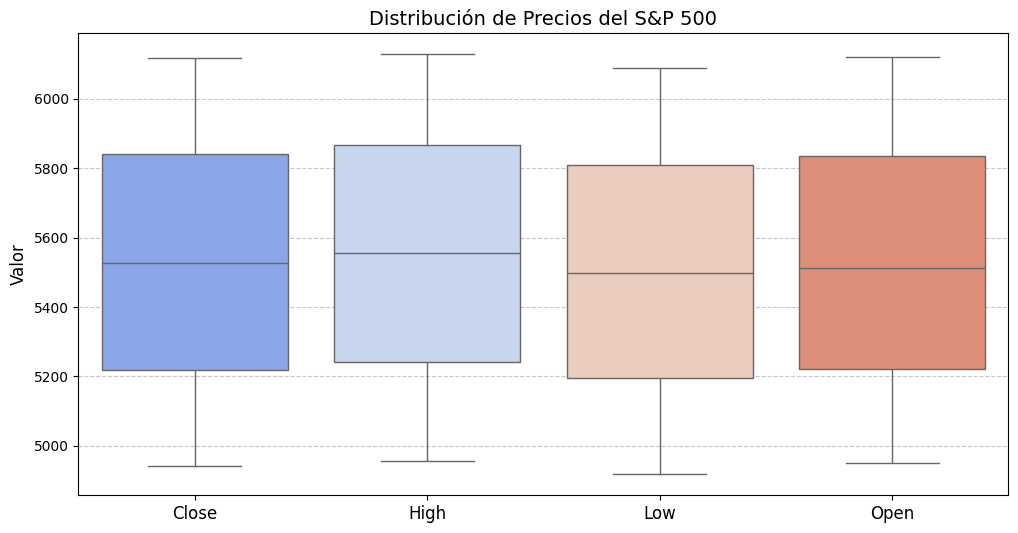

In [ ]:
# Gráfico 4A: Boxplot de precios para detectar outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Close', 'High', 'Low', 'Open']], palette="coolwarm")
plt.title("Distribución de Precios del S&P 500", fontsize=14)
plt.ylabel("Valor", fontsize=12)
plt.xticks(ticks=range(4), labels=['Close', 'High', 'Low', 'Open'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


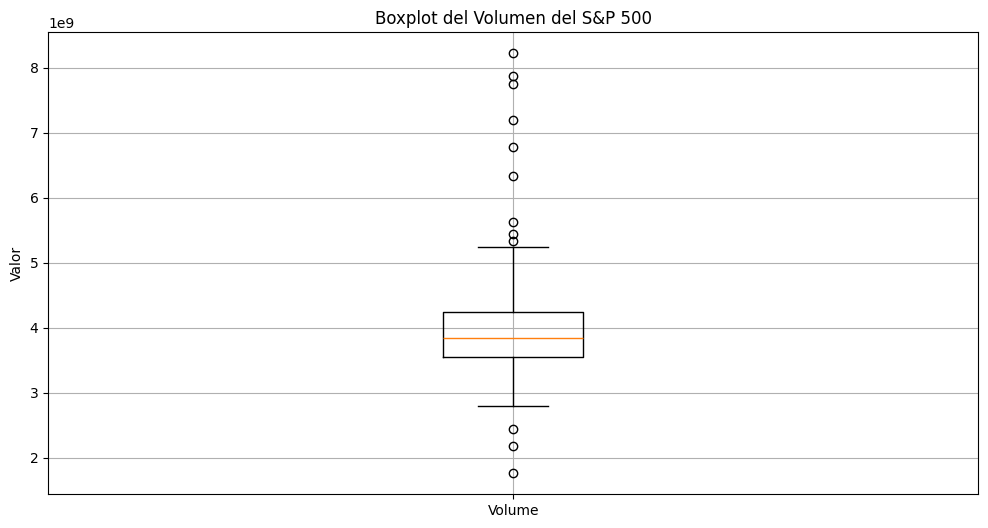

In [ ]:
# Gráfico 4B: Boxplot de precios para detectar outliers
plt.figure(figsize=(12,6))
plt.boxplot([df['Volume']], tick_labels=['Volume'])
plt.title("Boxplot del Volumen del S&P 500")
plt.ylabel("Valor")
plt.grid(True)
plt.show()


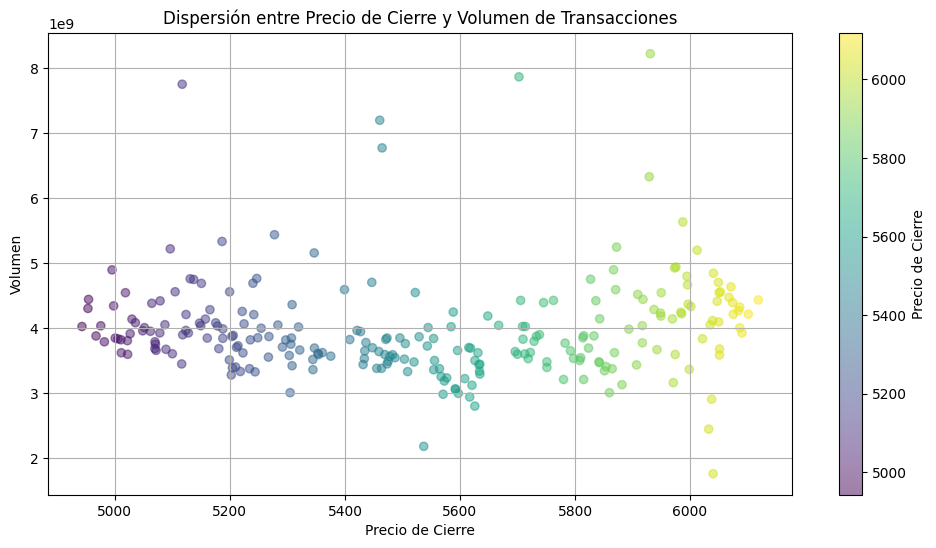

In [ ]:
# Gráfico 5: Relación entre Precio de Cierre y Volumen de transacciones
plt.figure(figsize=(12,6))
plt.scatter(df['Close'], df['Volume'], alpha=0.5, c=df['Close'], cmap='viridis')
plt.colorbar(label="Precio de Cierre")
plt.xlabel("Precio de Cierre")
plt.ylabel("Volumen")
plt.title("Dispersión entre Precio de Cierre y Volumen de Transacciones")
plt.grid(True)
plt.show()


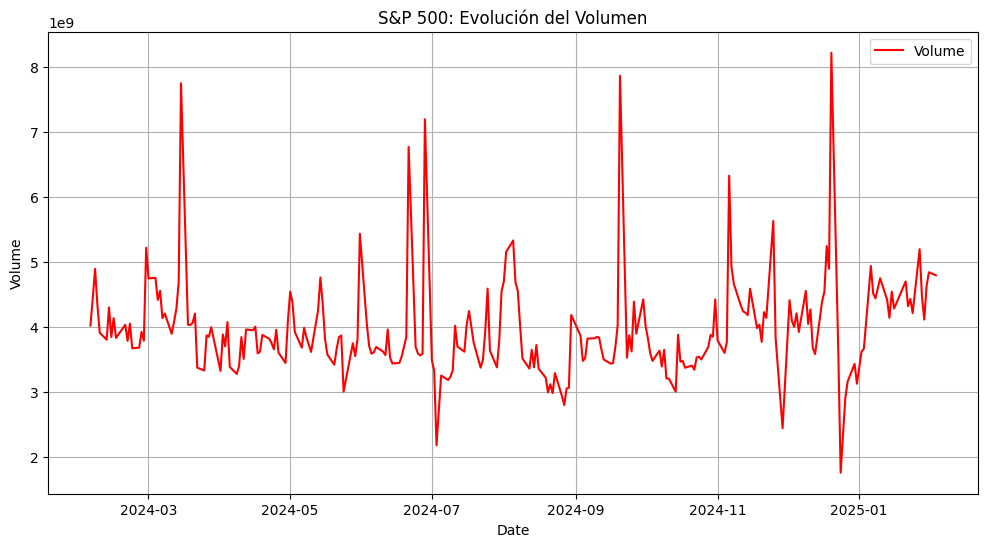

In [ ]:
# Gráfico 6: Evolución del volumen para identificar outliers
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Volume'], label="Volume", color="red", linewidth=1.5)
plt.xlabel("Date")
plt.ylabel("Volume")
plt.title("S&P 500: Evolución del Volumen")
plt.legend()
plt.grid(True)
plt.show()


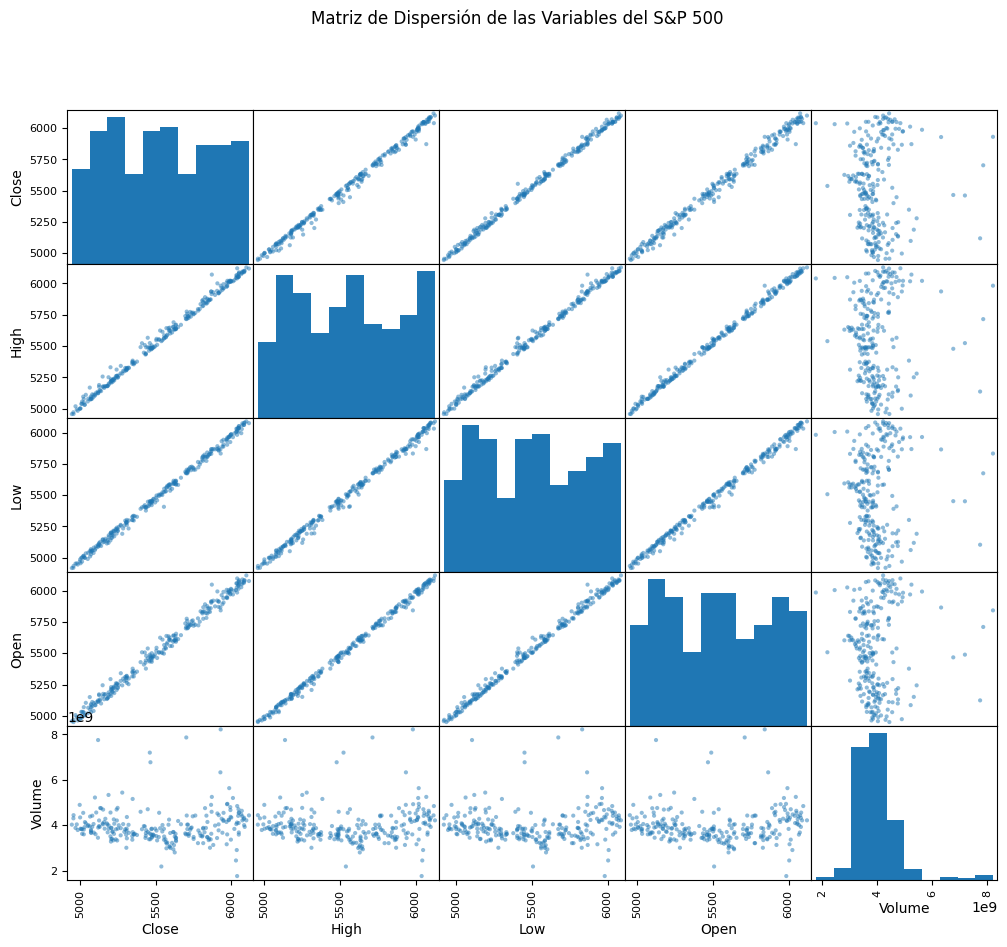

In [ ]:
# Gráfico 7: Matriz de diagramas de dispersión entre variables relevantes
scatter_matrix(df[['Close', 'High', 'Low', 'Open', 'Volume']], figsize=(12,10), alpha=0.5, diagonal='hist')
plt.suptitle("Matriz de Dispersión de las Variables del S&P 500")
plt.show()

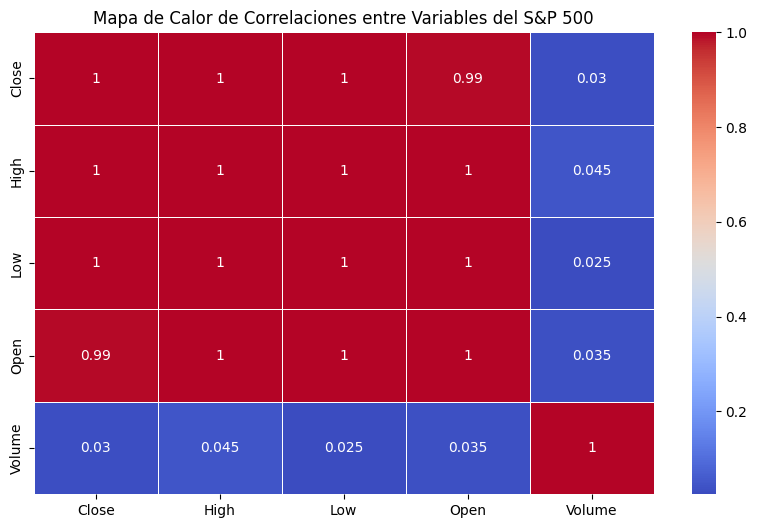

In [ ]:
# Gráfico 8: Correlación entre las variables en un heatmap
plt.figure(figsize=(10,6))
corr_matrix = df[['Close', 'High', 'Low', 'Open', 'Volume']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor de Correlaciones entre Variables del S&P 500")
plt.show()

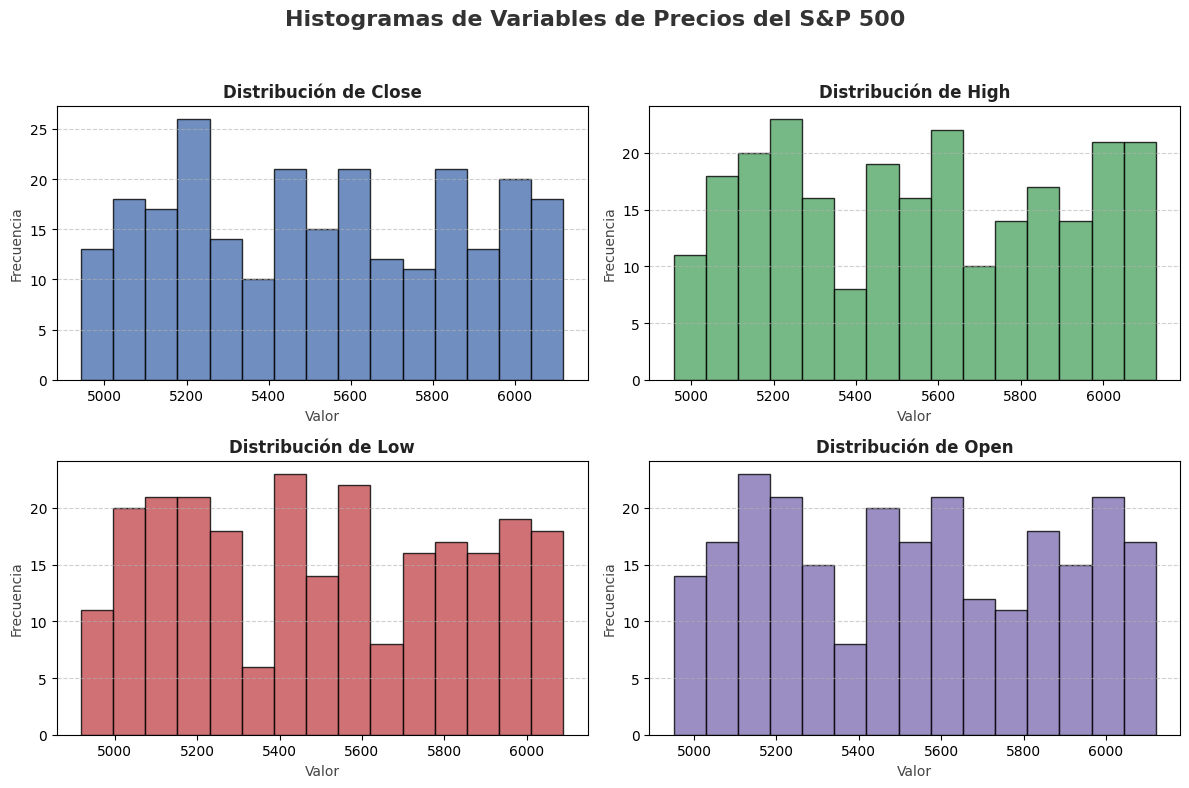

In [ ]:
# Mejorar la visualización del histograma con colores personalizados y mayor claridad
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Histogramas de Variables de Precios del S&P 500', fontsize=16, fontweight='bold', color='#333')

# Definir colores y variables
colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b3']
columns = ['Close', 'High', 'Low', 'Open']

# Crear histogramas individuales con mejor visualización
for ax, col, color in zip(axes.flatten(), columns, colors):
    ax.hist(df[col], bins=15, edgecolor='black', alpha=0.8, color=color)
    ax.set_title(f'Distribución de {col}', fontsize=12, fontweight='bold', color='#222')
    ax.set_xlabel('Valor', fontsize=10, color='#444')
    ax.set_ylabel('Frecuencia', fontsize=10, color='#444')
    ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


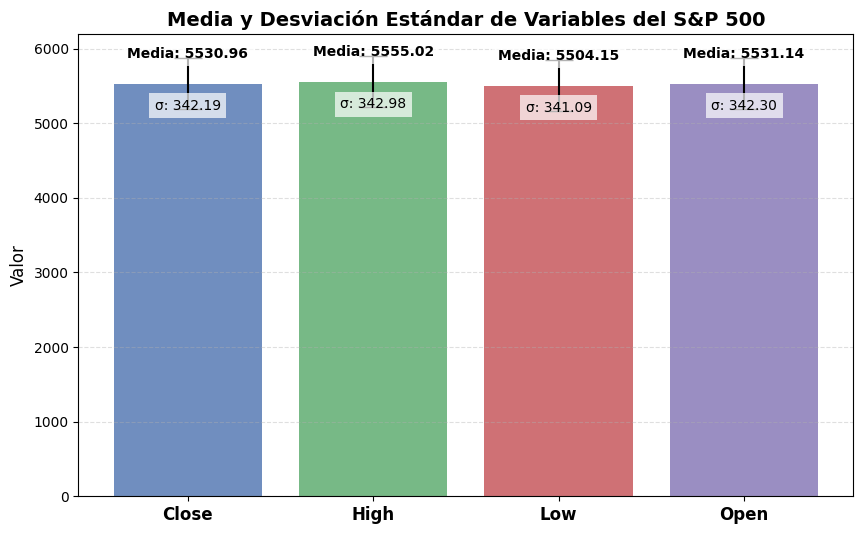

In [ ]:
# Seleccionar las columnas de interés
selected_columns = ['Close', 'High', 'Low', 'Open']
means = df[selected_columns].mean()
stds = df[selected_columns].std()

# Gráfico de barras mejorado con anotaciones de media y desviación estándar sin interferencia visual
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(selected_columns))
bars = ax.bar(x, means, yerr=stds, capsize=10, color=['#4c72b0', '#55a868', '#c44e52', '#8172b3'], alpha=0.8)

# Agregar anotaciones de valores de media y desviación estándar, ajustando la posición para evitar interferencias
for bar, mean, std in zip(bars, means, stds):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + std + 8, f'Media: {mean:.2f}',
            ha='center', fontsize=10, fontweight='bold', color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() - std - 10, f'σ: {std:.2f}',
            ha='center', fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

ax.set_xticks(x)
ax.set_xticklabels(selected_columns, fontsize=12, fontweight='bold')
ax.set_ylabel('Valor', fontsize=12)
ax.set_title('Media y Desviación Estándar de Variables del S&P 500', fontsize=14, fontweight='bold')

# Reducir la opacidad de la cuadrícula para mejorar la visibilidad de los números
ax.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()
